In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/feature_descriptions.csv')
df

,node,feature_id,topk,names,recall,precision,f_score,recall_test,precision_test,f_score_test,node.1,feature_id.1,feature_type,component
0,"Node(component_name=q, layer=9, head=7, seq_po...",0,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=q, layer=9, head=7, seq_po...",0,dead,"(q, 9, 7)"
1,"Node(component_name=q, layer=9, head=7, seq_po...",1,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=q, layer=9, head=7, seq_po...",1,not_ioi,"(q, 9, 7)"
2,"Node(component_name=q, layer=9, head=7, seq_po...",2,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=q, layer=9, head=7, seq_po...",2,not_ioi,"(q, 9, 7)"
3,"Node(component_name=q, layer=9, head=7, seq_po...",3,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=q, layer=9, head=7, seq_po...",3,dead,"(q, 9, 7)"
4,"Node(component_name=q, layer=9, head=7, seq_po...",4,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=q, layer=9, head=7, seq_po...",4,dead,"(q, 9, 7)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401403,"Node(component_name=z, layer=9, head=9, seq_po...",8187,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=z, layer=9, head=9, seq_po...",8187,dead,"(z, 9, 9)"
401404,"Node(component_name=z, layer=9, head=9, seq_po...",8188,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=z, layer=9, head=9, seq_po...",8188,dead,"(z, 9, 9)"
401405,"Node(component_name=z, layer=9, head=9, seq_po...",8189,0,NaN,0.000000,0.00000,0.0,NaN,NaN,NaN,"Node(component_name=z, layer=9, head=9, seq_po...",8189,not_ioi,"(z, 9, 9)"
401406,"Node(component_name=z, layer=9, head=9, seq_po...",8190,1,['Angel'],0.348837,0.46875,0.4,0.093023,0.210526,0.129032,"Node(component_name=z, layer=9, head=9, seq_po...",8190,first_name_IO,"(z, 9, 9)"


In [28]:
agg = df[df.f_score_test > 0.7].groupby(['component', 'feature_type']).node.count().reset_index().rename(columns={'node': 'count'})

In [33]:
heads_order = {
    'Duplicate Token\nOutputs': ['(z, 0, 1)', '(z, 0, 10)', '(z, 3, 0)'],
    'Induction\nOutputs': ['(z, 5, 5)', '(z, 6, 9)', '(z, 5, 8)', '(z, 5, 9)'],
    'S-Inhibition\nOutputs': ['(z, 7, 3)', '(z, 7, 9)', '(z, 8, 6)', '(z, 8, 10)'],
    'S-Inhibition\nValues': ['(v, 7, 3)', '(v, 7, 9)', '(v, 8, 6)', '(v, 8, 10)'],
    'Name Mover\nQueries': ['(q, 9, 9)', '(q, 9, 6)', '(q, 10, 0)'],
    'Name Mover\nKeys': ['(k, 9, 9)', '(k, 9, 6)', '(k, 10, 0)'],
    'Name Mover\nOutputs': ['(z, 9, 9)', '(z, 9, 6)', '(z, 10, 0)'],
}
plain_order = ['(z, 0, 1)', '(z, 0, 10)', '(z, 3, 0)', '(z, 5, 5)', '(z, 6, 9)', 
               '(z, 5, 8)', '(z, 5, 9)', '(z, 7, 3)', '(z, 7, 9)', '(z, 8, 6)', 
               '(z, 8, 10)', '(v, 7, 3)', '(v, 7, 9)', '(v, 8, 6)', '(v, 8, 10)', 
               '(q, 9, 9)', '(q, 9, 6)', '(q, 10, 0)', '(k, 9, 9)', '(k, 9, 6)', 
               '(k, 10, 0)', '(z, 9, 9)', '(z, 9, 6)', '(z, 10, 0)']

sorted_labels = [
    'io_position_BAB', 'io_position_ABB',
    's_name', 'first_name_S', 'second_name_S',
    'io_name', 'first_name_IO', 'second_name_IO',
    's_is_male', 's_is_female',
    'io_is_male', 'io_is_female',
    'contains_name',
    'first_name', 'second_name',
    'current_name', 'current_name_pos_1', 'current_name_pos_2',
    'context_pos_1', 'context_pos_2',
    'current_pos_is_gender_M', 'current_pos_is_gender_F'
]

In [25]:
df = pd.read_csv('../data/feature_descriptions.csv')
df.loc[(~df.feature_type.isin(['dead', 'not_ioi'])) & (df.f_score_test < 0.7), 'feature_type'] = 'no good description found'
agg = df.groupby(['component', 'feature_type']).node.count().reset_index().rename(columns={'node': 'count'})

In [29]:
agg['normalized count'] = agg.groupby('component', sort=False)['count'].apply(lambda df: df / df.sum()).values

In [100]:
color_dict = {
    'io_position_BAB': '#ff9999', 
    'io_position_ABB': '#ff6666',  

    's_name': '#9999ff',  
    'first_name_S': '#6666ff',  
    'second_name_S': '#3333ff', 

    'io_name': '#99ff99',  
    'first_name_IO': '#66ff66',
    'second_name_IO': '#33ff33',

    's_is_male': '#ffff99',  
    's_is_female': '#ffff66', 

    'io_is_male': '#ffcc99',  
    'io_is_female': '#ff9966',

    'contains_name': '#cc99ff',

    'first_name': '#99ccff',  
    'second_name': '#6699ff', 

    'current_name': '#d2b48c',
    'current_name_pos_1': '#a0522d',
    'current_name_pos_2': '#8b4513',


    'context_pos_1': '#cccccc',  
    'context_pos_2': '#999999',  

    'current_pos_is_gender_M': '#99ffff',
    'current_pos_is_gender_F': '#66ffff',
}

descriptions_dict = {
    'io_position_BAB': 'IO is 2nd name',  
    'io_position_ABB': 'IO is 1st name', 

    's_name': 'S is <name>', 
    'first_name_S': 'S is <name> and at 1st position',  
    'second_name_S': 'S is <name> and at 2nd position',  

    'io_name': 'IO is <name>',  
    'first_name_IO': 'IO is <name> and at 1st position', 
    'second_name_IO': 'IO is <name> and at 2nd position', 

    's_is_male': 'S is male',  
    's_is_female': 'S is female', 

    'io_is_male': 'IO is male',  
    'io_is_female': 'IO is female',  
    'contains_name': '<name> is in sentence',  

    'first_name': '<name> is at 1st position',  
    'second_name': '<name> is at 2nd position',  

    'current_name': 'current token is <name>', 
    'current_name_pos_1': 'token is <name> and at 1st position',  
    'current_name_pos_2': 'token is <name> and at 2nd position',  


    'context_pos_1': 'current token is at 1st position',  
    'context_pos_2': 'current token is at 2nd position',  

    'current_pos_is_gender_M': 'current token is male', 
    'current_pos_is_gender_F': 'current token is female', 
}



([], [])

<Figure size 2000x1000 with 0 Axes>

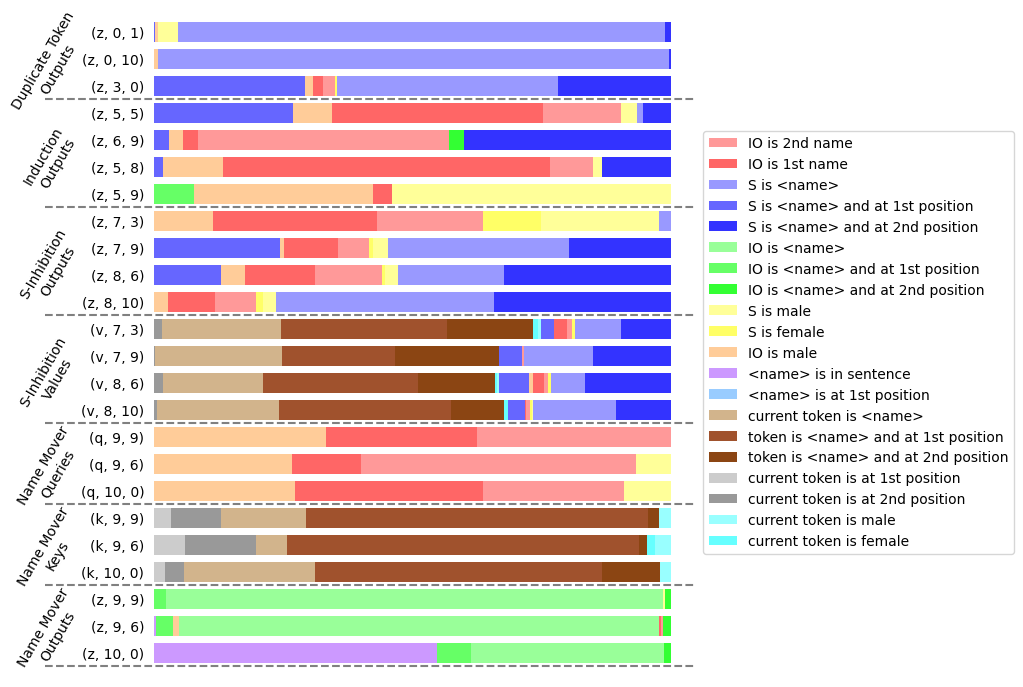

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.figure(figsize=(20, 10))
piv = agg.pivot(index='component', columns='feature_type', values='normalized count').fillna(0)
piv = piv.loc[plain_order]
piv = piv.iloc[::-1]
barh = piv.plot(kind='barh', stacked=True, figsize=(7, 8.5), color=[color_dict.get(x, '#333333') for x in piv.columns], width=0.75)

total_length = len(piv)

y_pos = total_length
for category, values in heads_order.items():  
    cat_length = len(values)
    y_pos -= cat_length
    middle_of_category = y_pos + cat_length / 2 - .7
    plt.text(-0.2, middle_of_category, category, va='center', ha='center', rotation=60, fontsize=10, color='black')

y_pos = total_length
for category, values in heads_order.items():
    y_pos -= len(values)
    plt.axhline(y=y_pos - 0.5, color='grey', linestyle='--', xmin=-0.2, clip_on=False)

plt.ylabel('')

handles, labels = plt.gca().get_legend_handles_labels()
label_handle_map = dict(zip(labels, handles))
sorted_handles = [label_handle_map[label] for label in sorted_labels if label in label_handle_map]
plt.legend(sorted_handles, [descriptions_dict[label] for label in sorted_labels if label in label_handle_map], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True)
plt.xticks([], [])



In [16]:
agg.to_csv('../data/stacked_boxplot.csv')